In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import datetime

sys.path.append("/Users/lpozzi/repos/polso/strava/")

import pandas as pd

from IPython.display import Markdown

from strava_dash import StravaScraper

tsugaru_distance = 28968.2 / StravaScraper.M_TO_YD

def to_delta(x):
    return pd.to_timedelta(x, unit='h')

In [4]:
%%capture
training = StravaScraper()
training.get_swims(after='2018-12-01', before='2019-09-01')
training.get_xtraining(after='2018-12-01', before='2019-09-01')

![](../images/2019_japan/dragons.jpeg)

Last year, before my [Anacapa](https://medium.com/drowning-in-data/river-lake-pool-and-ocean-drowning-in-data-8c0a29a94609) swim, I did one last "long" swim with [Steve](http://openwaterpedia.com/index.php?title=Steve_Walker) and [Cam](http://openwaterpedia.com/index.php?title=Cameron_Bellamy) who was just back from his successful Tsugaru Crossing (and sporting the awesome cap gifted when you make the crossing). On the way back from the Golden Gate I picked their brains about swims. Next year (Sept. 2020) I'm booked for an English Channel Attempt, but I didn't want to go empty handed this year, and I wanted a pleasing destination, not to be too much of a pain in the ass for my wife Kris. Cam's experience in Tsugaru seemed very positive, so I asked them to send me the contact. A conversation with [Ryan](http://openwaterpedia.com/index.php?title=Ryan_Utsumi) (back from a successful Tsugaru and North Channel) solidified my inspiration. Ryan's advice is always a great guidance and I value him greatly as a menthor and a Friend.

This post is going to describe my training during the 2019 season, preparing for the Tsugaru crossing, and a description of the details of the trip and the swim, so to redistribute some of Ryan's wisdom and make the swim less cryptic to people who want to learn more about it.

## The Plan

My plan, learning from [last year's learnings](https://medium.com/drowning-in-data/river-lake-pool-and-ocean-drowning-in-data-8c0a29a94609), was to hit the Bay more heavily, and to support with as many cross-training session as I could. On top of this, it was my misunderstanding that the temperature was supposed to be between 65F and 60F, mostly from Cam, Steve, and Ryan's experiences, albeit, much earlier in the season. This, and my purpose to ramp up to colder swims, motivated a huge effort in improving my cold swimming skills and to push longer and longer during winter.

## The Execution

Weekly averages and total distance will seem low compared to what I was planning and to my execution in previous years (see more below). However, an average of 2 to 3 hours weekly of cross-training (usually running to [Body Works SF](https://www.bodyworksf.com/), lifting for an hour and then running home) and much longer weekend swims really made the difference.

In [23]:
avg_x_train = training.x_training.groupby(['ds_week_ending', 
                                           'month']).count().reset_index().groupby(
    'month').activity.mean()
avg_x_train.index = avg_x_train.index.map(lambda x: datetime.date(1900, x, 1).strftime('%B'))

training.monthly_yardage.merge(
    pd.DataFrame({'avg_weekly_cross_train': avg_x_train}).apply(to_delta),
    right_index=True, left_index=True).loc[['December', 'January', 
                                            'February', 'March', 'April', 
                                            'May', 'June', 'July', 'August']]


,distance,hours,weekly distance,avg_weekly_cross_train
December,33580.716743,11.211667,8395.179186,01:48:00
January,39425.077944,12.580278,9856.269486,01:19:59.998800
February,79435.346599,25.206111,19858.836650,02:30:00
March,86772.922894,27.959444,21693.230724,02:00:00
April,73909.116547,23.843333,18477.279137,03:00:00
May,81544.592206,26.697778,20386.148052,03:00:00
June,86922.419381,27.099722,21730.604845,01:30:00
July,65743.568121,22.673889,16435.892030,02:15:00
August,92692.961907,26.205000,23173.240477,02:00:00


In [5]:
from IPython.display import Markdown

Markdown("""
##### Total Yards: {0} 
""".format(training.total_yards))


##### Total Yards: 640026 


What I focused on this season was to go longer in colder water. This started in February, ramping up to 3 hours (@53F), then 4 hours when water warmed up to 55F. I made 3 trips to Sand Diego, one for a 4 hours swim, then 2 more for 6 hours training sessions with the awesome [Dan S(w)imonelli](http://openwaterpedia.com/index.php?title=Dan_Simonelli) kayaking for me.

The peak of my season were 3 "back to back" 6 hours swim, the first in late June (after a vacation in Italy) on a Round Trip Baker Beach with [Lauren Au](https://openwaterswimming.com/2019/09/calm-swimmer-achieves-triple-crown-of-open-water-swimming/), then another one for my birthday (June 29th) in San Diego (La Jolla to Ocean Beach and back), then another one in mid July with the wonderful peeps at [Pacific Open Water Swim Co.](https://www.pacificswim.co/), all around Sausalito and Angel Island (I couldn't reccomend more their expertise and great vibes!)


I have to thank The Pod, i.e. [Lauren Au](https://openwaterswimming.com/2019/09/calm-swimmer-achieves-triple-crown-of-open-water-swimming/) and [Lauren L.](https://www.instagram.com/swimsintheswells/), [Ryan](http://openwaterpedia.com/index.php?title=Ryan_Utsumi), 
[Randy](https://www.wsj.com/articles/the-next-big-swim-after-the-english-channel-1539435601), and Keira for all the support and inspiration, and the Elders of the Club, i.e. Duke, Hal, and Terry for always being ready to kayak in rough waters for hours and hours, with a huge smile. I could have not pushed this hard without them.



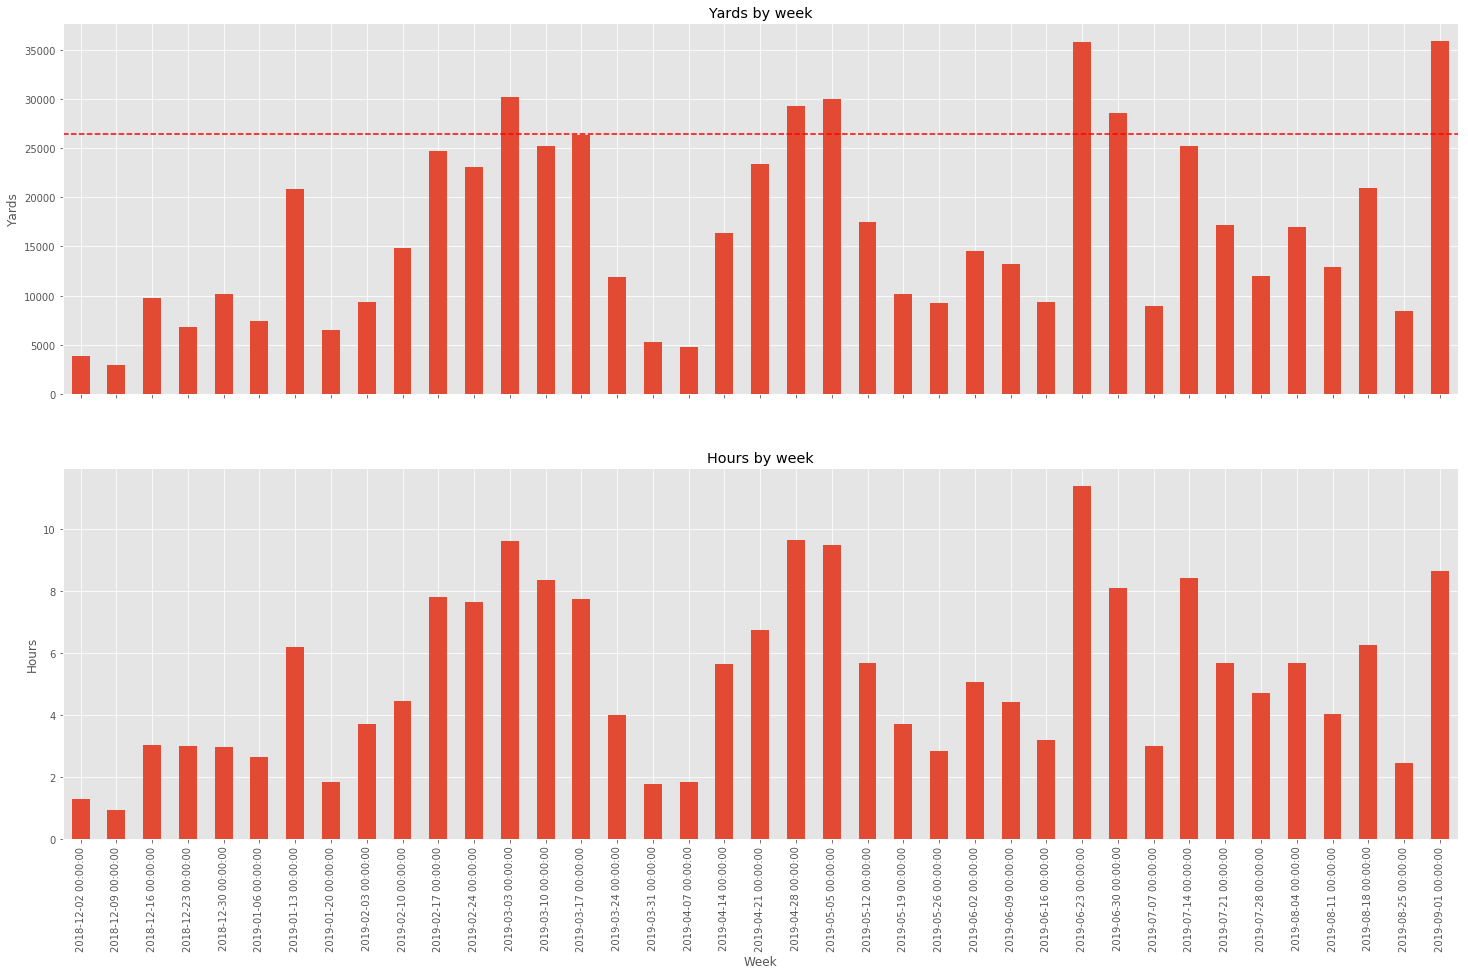

In [7]:
tmp = training.plot_summary(yardage_goal=tsugaru_distance)

Looking at the Indoor/Outdoor breakdown it pops out how my season was massively open water centered, with very minor pool adjustments. This is a bit contrary to my plan to be a better pool swimmer to get the quality work, but it took a lot of pressure out since open water is way more fun. 

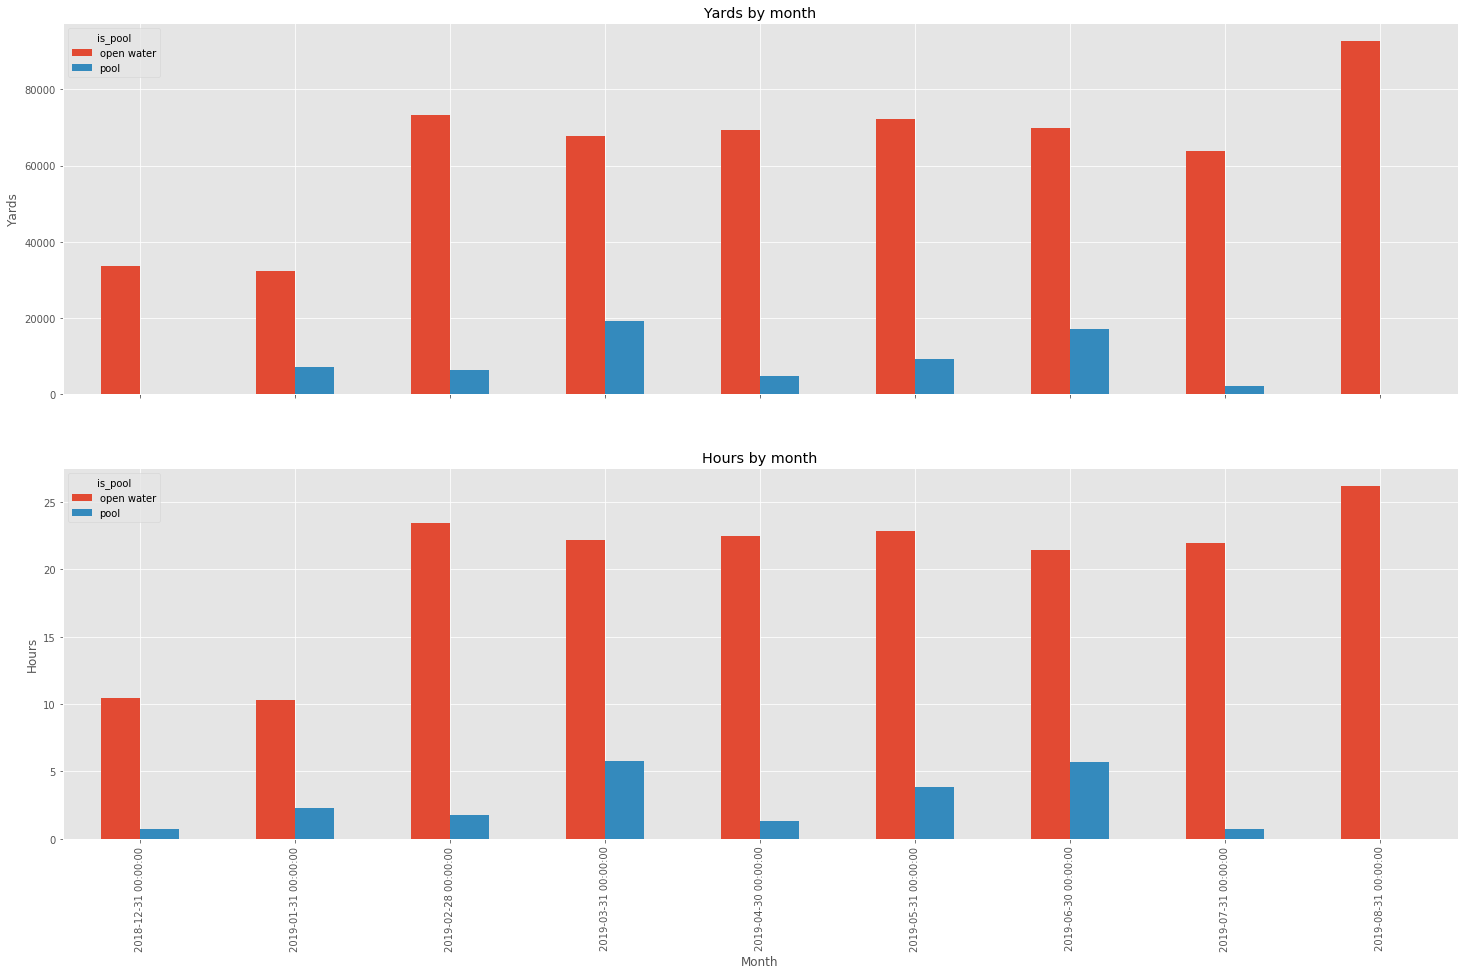

In [8]:
tmp = training.plot_summary(in_n_out=True, by='month')

## Crosstraining

While swimming took most of my focus, supporting with extra sessions in the gym and running in the streets helped greatly. Yoga helped stretching and protecting from injury, hip strengthening excercises helped eliminating those annoying hip pains that I lamented in previous years. All in all the more diverse training took a lot of strains out of my shoulders which did not bug me at all (almost) during this season. 

In [16]:
full_training.groupby(['ds_month_ending', 
                       'activity'])['elapsed_time'].sum().apply(lambda x: x / 3600).unstack().applymap(to_delta)

activity,OpenWater,Pool,Rowing,Run,WeightTraining,Yoga
ds_month_ending,,,,,,
2018-12-31,0 days 10:27:42.001200,00:45:00,NaT,03:40:33.999600,03:00:00,NaT
2019-01-31,0 days 10:19:49.000800,02:15:00,NaT,00:16:09.998400,01:00:00,02:00:00
2019-02-28,0 days 23:27:21.999600,01:45:00,00:15:00,00:18:47.001600,04:00:00,03:00:00
2019-03-31,0 days 22:09:06.001200,05:48:28.000800,NaT,00:30:32.000400,03:00:00,01:00:00
2019-04-30,0 days 22:30:36,01:19:59.998800,00:07:00.001200,01:23:40.999200,04:00:00,01:00:00
2019-05-31,0 days 22:51:51.998400,03:49:59.998800,NaT,01:25:51.999600,03:00:00,NaT
2019-06-30,0 days 21:25:37.999200,05:40:21,NaT,NaT,03:19:59.998800,NaT
2019-07-31,0 days 21:55:26.000400,00:45:00,NaT,02:08:03.998400,03:00:00,NaT
2019-08-31,1 days 02:12:18,NaT,05:36:01.000800,00:23:17.998800,01:00:00,NaT


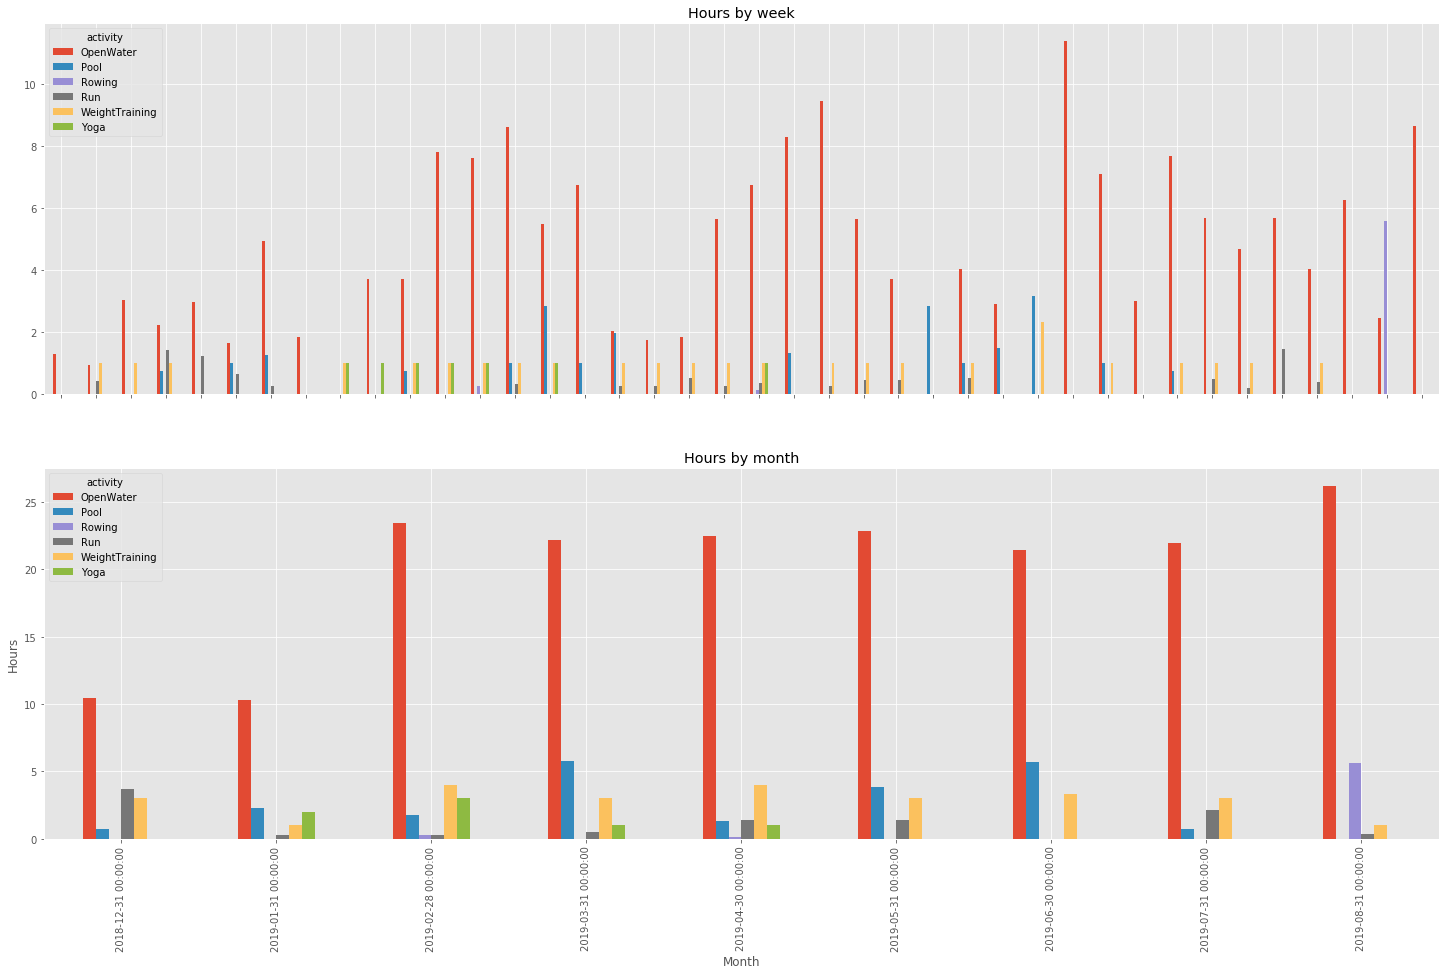

In [17]:
tmp=training.plot_x_training()

## Sticky Training

Comparison to previous years is really eye opening. My yardage in 2019 was 70% of yardage in 2018. This is a **massive** decrease! 

In [24]:
%%capture
training_old = StravaScraper()
training_old.get_swims(after='2017-11-01', before='2018-09-30')

In [25]:
Markdown("""
##### Year on Year: 2018/2019 = {0:%} 2017/2018
""".format(training.total_yards / float(training_old.total_yards)))  


##### Year on Year: 2018/2019 = 68.370081% 2017/2018


While the pool workous were a mere 30% of the ones I did in 2018, my open water mileage went up by 30%! Unsurprisingly considering the emphasis I put on long swims and Saturday workouts with The Pod.

In [26]:
training.in_out / training_old.in_out

,total,percentage
is_pool,,
open water,0.883116,1.291669
pool,0.229043,0.335005


This is a continued trend (as much as 3 points can ever define one) which has me shifting yards from quantity to quality work, supported by cross-training and longer sessions. From the table below, total yards in 2019 were half the yards I swum on my first season in 2017, but the open water mileage is on the same magnitude, pool yards decreased significantly. As far as fitness goes, I've been feeling better than ever, giving me confidence on both the transfer of my training from year to year ("it doesn't go away") and on the combo quality swims/dryland work (my hips have not been bugging me at all this season and my shoulders have been extra healthy!).

In [29]:
train_dummy = StravaScraper()
total_yards = []
in_out = []
for after, before in [('2017-01-01', '2017-09-05'),
                      ('2017-11-01', '2018-09-30'), 
                      ('2018-11-01', '2019-09-01')]:
    train_dummy.get_swims(after=after, before=before)
    total_yards.append(train_dummy.total_yards)
    in_out.append(train_dummy.in_out.total)
training_years = pd.merge(pd.DataFrame(total_yards, index=['2017', '2018', '2019']),
                          pd.DataFrame(in_out, index=['2017', '2018', '2019']), 
                          right_index=True, left_index=True)
training_years.columns = ['total_yards', 'open_water', 'pool']
training_years

,total_yards,open_water,pool
2017,1151960,685453.094522,466507.013833
2018,936120,650715.010316,285405.744638
2019,649035,582164.801491,66870.205143


## A Retrospective

### What worked

1. [Better nutrition](https://medium.com/drowning-in-data/fueling-dreams-eb037371d256) made all the difference in the world! Being more analytical and deliberate about calories consumption and great advice from Lauren helped fixing some issues and making me more resilient to cold and distance.
2. More emphasis on cold training made for a stronger start of the year and growth in that area (priceless in sight of the swims I'm planning for the future)
3. Longer and longer swims, possibly back to back, helped building a strong base that carried me through the crossing. I'll be definitely doubling down on this since it made the training more quality oriented and got me used to longer effort.
4. Crosstraining made miracles as I explained above, so definitely more of it!


### What didn't work

1. Frontloading my training (and peaking in late June) lead to somewhat of a burnout. I felt extremely tired and started tapering a bit earlier than I would have liked. Things worked out fine in the end (training is sticky), but a smarter way to train (maybe using heart rate to monitor training level) would help to justify when to rest and when to push, taking some mental strain about interpreting signs out of the picture (#science)
2. More pool training would be a nice to have. My speed was quite fine during the crossing, but sprinting more in the pool could make it even better.
3. Even if I tuned my feeds better, I feel the need to have more "natural" feeds. After 4 hours gels start being too heavy and, although by that point I am usually burning fats, a more natural and light alternative would be more sustainable.

# Tsugaru

There are few peculiarities to this swim. Among The Seven is the one with the highest language barrier, it has a ~50% success rate and it's situated in a quite remote area of Japan which is not denseley populated nor easy to reach. So I thought it may be worth to collect here all the info I've been passed and I collected about how to organize the swim, what to expect, and what would be important to know.


Your contact for this swim is [Yusuke Shimasaki](mailto:shimasaki-yusuke@venga-japan.com). He'll take care of having you fill up your application, to find the boat, the observer, and if needed an interpreter.

Early season's swim can be pretty cold, while late in the seasons temperatures will be quite balmy

```
July　       Aomori side 20-22°C　Hokkaido side 14-15°C
August　     Aomori side 24-25°C　Hokkaido side 18-20°C
September　  Aomori side 22-24°C　Hokkaido side 18-20°C 
```

Water does cool down as you approach Hokkaido, so, if you swim in the cold season be ready for dealing with that, and if you swim in the warm season you'll have something to look forward to.

The window for the swim is 5 days (mine was August 29th to September 2nd) and there are two slots for window. The first swimmer takes the first 3 days and the second takes the scraps of the first plus the last two days.

Doing the math you have `2 + 2 * P{going on first day} + P{going on the second day} >= 2 days` which means you have, on average, pretty good chances as a second swimmer as well. Two boats escort a swimmer/relay and usually two swimmers/relays will depart independently on each good date.



Main accomodation for this swim is [Hotel Tappi](http://www.hoteltappi.co.jp/), a cute onsen (hot springs) hotel perched on Tappi cape (Tappi translates to "Tail of the Dragon"). Book in advance because, even if the place is usually not crowded, is the first stop for groups traveling to and from Hokkaido, hence it may fill up abruptly due to buses making a stop for the night. Yusuke can also help communications with the hotel (in my case to reshuffle the rooms and figure out a room for a day that seemed fully booked). The hotel includes two traditional meals (breakfast and dinner). In case raw fish and traditional food is not your thing and/or you want to stick to something more familiar, the hotel can arrange a more traditional meal based on meat and rice. Lunch is available in few outside restaurants, the closest is on the hill on the right of the hotel's exit. Be sure to show up early, since availability is limited, but the ramen is great! The hotel can also pack a to-go bento box for your crew, so that they can bring their breakfast on the boat. Be sure to give them an heads up when you go for your swim so they can also provide crates or other improvised seating for the boat.

Tappi is remote. When you're there it's clear that, as an outsider, you're there for the swim (and people will cheer for you). English is not very common and the hotel personnel uses a translator device to allow better communication. An app like Google Translator will also help immensely. Be patient, as a ESL myself I appreciate how phrases that seem trivial to a native speaker can be confusing to a foreigner.


There are few places where you can swim while you wait. [This](https://goo.gl/maps/YBnjNsy6RZU66hGh6) and [this one](https://goo.gl/maps/BavJKpTQe8qeZMNv9) with a cute beach area. There is a temple on the hill where Minamoto Yoshitsune went to pray for a safe crossing. It's a nice daytime activity and has a great view of the sea.

There are no shops in Tappi and I went to buy stuff in Kodomari (there's a Family Mart). Be sure to plan accordingly.

You can get to Tappi from Tokyo by taking the Shinkansen up to Shin-Aomori. I then drove an extra hour to the actual hotel. I found having the car useful for the extra flexibility. Remember that they drive on the left side of the street, like in the UK. 


Very useful is the [Rail Pass](https://www.japan-rail-pass.com/jr-pass) which gives you unlimited Shinkansen rides for its duration, being quite useful also for traveling around Japan after the swim.

We rented from [JR Rent-A-Car](https://www.ekiren.co.jp/phpapp/en/). There's a branch (and cars) at the Shin-Aomori station. The "area" is Tohoku and the "office" is Shin-Aomori.  There's a couple of miles in Aomori where you're driving in a city. the rest of the drive to Tappi is pretty laid back.  


We rented a [pocket wi-fi device](https://www.japan-rail-pass.com/services/pocket-wifi), which worked really well, both in Tappi and in Tokyo, this works for multiple (4+) devices and very reliable (don't forget to charge it at night). Same company as the rail pass (Japan Rail Pass)rents them here. Super easy to pick up at the airport, and return at the airport.


Conditions can be really rough. Wind turbines on the Tappi hill make crystal clear how wind is strong and constant throughout the year. Current is also quite gnarly and mostly one directional (East to West).

The [Kodomari Route](https://www.openwaterpedia.com/index.php?title=Kodomari_Route) starts on Kodomari Benten Cape on Honshu's Aomori Prefecture and finishes at Shirakami Misaki on Hokkaido. This is a bit longer than the direct shot from Tappi, but allows the swimmer to describe a S-shaped route, going out wide from Kodomari, then being brought back in by the current to land, with some corrections to beat the nasty current on the last stretch.

The game is to go out strong at the beginning, to buy yourself some precious time, but to be ready to fight extra hard at the end to cut through the last current.

Being swept away at the final cape usually makes the difference between making it or not.

The boats are quite minimal Japanese fishing boats. They're low on the water (so you're close to your crew and you don't need a long rope for your feeds) and have no shelter, so your crew should be ready for rain or shine. It's large enough to move around, but there's nowhere to sit, so be prepared to borrow crates or seats from the hotel. The bathroom "situation" is also particular, as you can see in the picture.


![bathroom facility on the boat](../images/2019_japan/tsugaru_boat.jpg)


The boat will be fully illuminated (each swimmer is actually escorted by two boats) and will tow an underwater streamer on the side which is extremely helpful to give you something to focus on and to keep the track. Basically you stare at the line on the bottom, like in the pool, and don't have to worry about sighting.

## The Waiting

[The waiting was quite hard mentally](https://www.youtube.com/watch?v=uMyCa35_mOg). As per previous communication I thought I was the second swimmer in the window, but somehow I managed to go on the 30th, which was the best day of the window. In the days leading up to the swim I was coming to terms with the possibility of not having a chance to fight and with the ineluctabilty of conditions. This was a good exercise in zen and in coping with circumstances that can not be modified. The badass [Herman Van Der Westhuizen](https://db.marathonswimmers.org/p/herman-van-der-westhuizen/) succeeded on his attempt the day after, with extremely rough conditions, showing how even a single day can make a huge difference. Herman was at his second attempt and made me meditate on the uncertainty component in this sport: you can put up the fight of your life, but you can't wrestle the ocean, just hope the dragon doesn't wake up on the wrong side of the bed.

Just as [Minamoto no Yoshitsune](https://en.wikipedia.org/wiki/Minamoto_no_Yoshitsune) in his apocriphal escape to Hokkaido, I stared as the sea a lot, having the (extremely helpful) [windy app](https://windy.app/) to monitor conditions.

A swim at the [beach area](https://goo.gl/maps/BavJKpTQe8qeZMNv9) helped blowing some steam and to learn about the sea lice/fire water. Kris and I jumped in for a short swim and felt super itchy. 




## The Swim

On August 29th we met the observer Ami and our awesome interpreted Jeremy (who got adopted by the Pozzis) in Kodomari and I was thrilled to learn that the swim was a go for midnight. This is a huge change from previous years, when night starts (which I prefer) were not an option.

We rushed home to prepare my feeds and go to bed. I "slept" from 5pm to 9pm, then we drove over the windy mountain road to Kodomari! 11pm go time! 

I got greased up on the boat and jumped in the warm darkenss of the sea of Japan and started following the streamer. 

The boat was very lit and the water crawling with life: mostly tiny prickly jellies (most of the times they felt like I was wearing a prickly sweater, but a few of them woke me up with stronger stings ) and small flying fish. 

I started as fast as I could, then I realized I could keep that pace for longer! My only thought was around the great chance I received and on how not to spoil it.

When the sun came up I was approximately 4 miles from shore, then a current slowed me down considerably and made me lose my morale a bit: I misunderstood the tired faces of my valiant crew for defeat. 

I wasn’t going to be pulled so I swam the last few hours out of stubborness! My lovely wife Kris jumped in for the last 500m and she escorted me to a razor sharp rock on which I climbed with unsure legs: Hokkaido at Last!!! 


Beer and Onsen with Kris and my parents (who crewed excellently for me) crowned the celebrations! 

![](../images/2019_japan/onsen_tappi.jpg)

My outstanding crew was composed by my parents Laura and Kiki, veteran of my 20 Bridges, my badass wife Kris (who just triumphed over a [Vikingsholm swim](https://www.swimtahoe.com/tahoe-viking-swim/) in Tahoe, and the interpreter Jeremy Eaton, who helped out immensely and was super fun to hang with. I owe then a lot since this is a team sport and you can't make it alone.


> 43rd person to cross [Tsugaru](https://db.marathonswimmers.org/events/tsugaru-strait/) (Honshu to Hokkaido), first Italian. 

# Official time  8h20’58"! 


![](../images/2019_japan/tsugaru_wide.jpg)

Here is [a shout out](http://www.tsugaruchannelswimming.com/2019/09/luca-pozzi-swims-through-night-across.html) from the channel swimming site, below my actual track (not quite as S shaped as the article mentions) and my speed through the crossing (which I'm quite proud of).

As you can tell from the track, I had pretty good conditions and a relatively straight shot, but that pesky current at the end made me work for closing the deal.

I started high on the jitters of even having the chance to swim and I kept fueling myself with the tought that I could waste such a great opportunity.



![](../images/2019_japan/TsugaruTrack.png)

![](../images/2019_japan/TsugaruSpeed.png)


[Here](https://track.rs/mrpozzitsugaru/) the full tracker.

# Lessons Learned and Moving Forward

This year was one of great growth and mautrity, both in my training and in my nutrition. As I plan to tackle the English Channel in September 2020 (with some gnarlier swim on my mind for 2021) I have a few things I want to improve in my training

- More pool workouts to improve speed and technique.
- Try some solution such as [Whoop](https://www.whoop.com/) to have some analytics around fatigue level and training intensity. Rationalizing recover will help to avoid burnout and to take opinion out of rest days.

As usual I'm extremely grateful to many people that supported me and without them I wouldn't have been able to train. The support during the swim was also overwhelming and I'm super grateful to my Brother Amey for even organizing a viewing party at work!

Next Year: Britannia!



# Appendix Full Training

In [10]:
from IPython.display import HTML
HTML(training.get_full_training().to_html())

,ds_week_ending,name,distance,hours,activity
2018-11-07 06:39:15-08:00,2018-11-11,Daylights savings swim,2383.085551,0.750556,open water
2018-11-07 18:45:00-08:00,2018-11-11,[POOL] back indoor,1499.995476,0.500000,pool
2018-11-08 19:30:00-08:00,2018-11-11,Namaste and chill,0.000000,1.333333,Yoga
2018-11-23 11:45:08-08:00,2018-11-25,Turkey trot 🦃,5851.250944,0.692778,Run
2018-11-25 15:20:17-08:00,2018-11-25,😈 swim,2174.971568,0.739167,open water
2018-11-27 15:07:18-08:00,2018-12-02,Swimming off the 🦃,1514.212406,0.423611,open water
2018-11-29 10:55:33-08:00,2018-12-02,Morning Swim,1436.019291,0.453611,open water
2018-12-01 08:21:22-08:00,2018-12-02,Spectacular swim!,3636.690694,1.098333,open water
2018-12-01 11:07:06-08:00,2018-12-02,Justin’s First chill!,192.037916,0.190556,open water
2018-12-04 17:11:46-08:00,2018-12-09,Andata,1706.140961,0.183889,Run


[source](https://github.com/mrpozzi/mrpozzi.github.io/blob/master/notebooks/BigInJapan.ipynb)